<a href="https://colab.research.google.com/github/Asadhardy/Basics_of_statistics/blob/main/Statistics_Advance_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
'''
Statistics
Module_2
Statistics Assignment Advance_1
'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f, f_oneway, stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

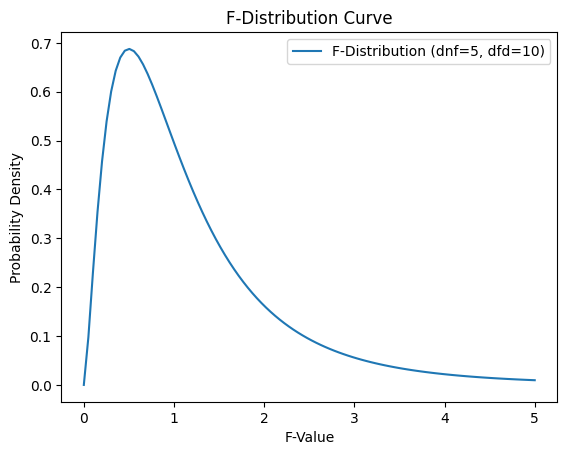

In [ ]:
'''
Q1. Explain the properties of the F-distribution.
Answer:
    The F distribution is a probability distribution that arise frequently in analysis of variance (ANOVA), regression
    analysis and hypotheses testing when comparing variances across groups.
    The F-distribution is used primarily in statistical analysis, often for comparing variances between two datasets.
    It appears as a right skewed curve, becoming more balanced as the sample sizes grow

The key points are:
    1.Shape:
        Right skewed, especially with small sample sizes.

    2.Values:
        Ranges only from 0 to positive infinity.

    3.Use:
        Frequently applied in ANOVA tests (for comparing group variances) and in regression analysis

    code_Examples:
'''
# Defining degrees of freedom for two groups
dfn = 5
dfd = 10

# Generating values for f distribution
x= np.linspace(0, 5, 100)
y = f.pdf(x, dfn, dfd)

# plotting the chart
plt.plot(x, y , label= f"F-Distribution (dnf={dfn}, dfd={dfd})")
plt.title("F-Distribution Curve")
plt.xlabel("F-Value")
plt.ylabel("Probability Density")
plt.legend()


'''
Insights:
    The F-distribution helps identify if variance between groups are significantly different, aiding in
    decision making, for instance, a high F-Value in ANOVA indicated a strong likelihood that at least one group differs
    from the others.
    '''
# Displaying th plot
plt.show()

In [ ]:
'''
Q2. In which types of statistical tests is the F-distribution used, and why is it appropriate for these tests?
Answer:
    The F distribution is commonly used in statistical tests that involve comparing variance. Its primary applications
    are in the Analysis of Variance (ANOVA) and Regression Analysis.
    Why F distribution is suitable for these tests are as following:

1.Analysis ov Variance(ANOVA):
    Purpose:
        ANOVA tests whether the means of several groups are significantly different from each other.
    Why F distribution is used:
        ANOVA analyzed the ratio of the variance between the groups to the variance within the groups.
        If the ratio (the F statistic) is significantly large, it indicates that not all group means are equal,
        making the F distribution ideal because it handles this type of variance ratio
    Code_Example:
'''
group1 = np.random.normal(30, 5, 20)
group2 = np.random.normal(35, 5, 20)
group3 = np.random.normal(40, 5, 20)

# ANOVA test
f_stat, p_value = f_oneway(group1, group2, group3)
print(f"Statistic: {f_stat}, P_Value: {p_value}")
'''
Insights:
    If the p-value is low (for eg. <0.05), we can reject the null hypothesis, suggesting at least one group's mean
    is different

    2.Regression Analysis:
        Purpose:
            In regression analysis, the F test evaluates the overall significant of the model, testing if a least one
            predictor variable significantly explains the outcome.
        Why F distribution i used:
            Here the F distribution measures the ratio of variance explained by the regression model to the unexplained
            variance(residuals), if the F statistic if high, the model explains the outcome variable better than
            random chance.
        Code_Example for the F test in Regression:
'''
# sample Data
x = np.random.rand(100, 2)
y = 3*x[:, 0] + 5*x[:, 1]+ np.random.normal(0, 1, 100)


# train test split
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

# Linear regression
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate the F statistic
# Regression sum of square
ssr = np.sum((y_pred-np.mean(y_train))**2)

# sum of squared error
sse = np.sum((y_test-y_pred)**2)

df_regression = x_train.shape[1]

# degrees of freedom for regression
df_error = y_test.size - df_regression -1 #degree for freedom error

F_statistic = (ssr / df_regression) / (sse / df_error)
print(f"F_statistics: {F_statistic}")
'''
Insights:
    A large F statistics suggests that the model significantly predicts the outcome,
    indicating a good fit.

Why F-Distribution is suitable?
    The F distribution is positively skewed and specifically designed for comparing variances
    between groups or within a model.
    It requires that the data generally follows a normal distribution and is ideal for ratio based tests.

Insights:
    The F distribution plays a crucial role in statistical testing when comparing
    variances across groups or evaluating the significance of predictive models.
    its unique shape a right skewed distribution that begins at zero and extend to infinity makes it
    well suited for analyzing variance ratios, ,by using the distribution in tests like ANOVA
    and regression analysis , we can determine if observed variations are meaningful or likely
    due to random chance, This allowos researches to make data driven decisions about
    group differences and model accuracy, strengthening the reliability and interpretation of resilts in
    various fields
    '''

Statistic: 16.352662911789164, P_Value: 2.43845019576557e-06
F_statistics: 29.48295609106496



In [ ]:

'''
Q3. What are the key assumptions required for conducting an F-test to compare the variances of two
populations?
Answer:
    To conduct an F-test to compare the variance of two populations, a few key assumptions must be met
    The assumptions are as following:

1.Independent of Observation:
    Each sample should be independent of the other, meaning observations within each group are not related.

2.Normal Distribution:
    Both populations should follow a normal distribution.
    The F-test is sensitive to deviations from normality, and non normal data can lead to inaccurate results

3.Random Sampling:
    Samples should be randomly selected from each population to avoid bias

4.Homogeneity of VAriance:
    This assumption generally applies to other tests involving f-distribution (for eg. ANOVA) but is not required
    when simply comparing two variaces using F test itself

When these assumptions hold, the ftest can effectively compare two variances, helping determine if they are
statistically significantly different.
'''
# sample data for two groups

data_1 = np.array([10, 12, 13, 16, 20])
data_2 = np.array([15, 17, 22, 28, 30])

# calculating Variance
var_1 = np.var(data_1, ddof=1)
var_2 = np.var(data_2, ddof=1)

# f statistics calculation (large variance in the numerator)
F = var_1 / var_2 if var_1 > var_2 else var_2 / var_1

# degrees of freedom
df_1 = len(data_1) -1
df_2 = len(data_2) -1

# Calculating p value
p_value = 1 - f.cdf(F, df_1, df_2)

print("F-statistic:", F)
print("p-value", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variance are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in vairnaces.")
'''
Insights:
    1.Interpreting the p_value:
        A small p-value (below the significant level, often 0.05) suggests a significant difference between variance,
        implying more variability in one group compared to the other.
    2.Real world use cases:
        The F test is applied in many fields like comparing the consistency of manufacturing processes ,
        evaluating teaching methods by the spread of test scores, or assessing machine reliability over time.
    3.Importance of variance comparision:
        Understanding variance differences helps identify where process improvements are needed, or if certain
        factors are impacting one group more than another
    This approach combines a code example with statistcal interpretation, providing practical insighs for
    understanding and applying the F-test.
'''
print()

F-statistic: 2.848684210526316
p-value 0.16745070875423707
Fail to reject the null hypothesis: No significant difference in vairnaces.



In [3]:
'''
Q4. What is the purpose of ANOVA, and how does it differ from a t-test?
Answer:
    ANOVA (Analysis of variance) is a statistical method used to determine if there are
    means of three or more groups.
    It helps asses whether the observed variations in the data are likely due to actual differences
     among the groups or merely due to random chance.

Key Differences Between ANOVA and T-Test

    1.Number of Groups:
        T-Test:
            Typically used to compare the mean of two groups

        ANOVA:
            Used when comparing three or more groups, while multiple t-tests could technically be
            used for more groups, ANOVA is preferred because it minimizes the error rate.

    2.Error Control:
        T-Test:
            Running multiple t-test for several groups increases the risk of type error ((False positive),
            where we incorrectly conclude there is a difference.

        ANOVA:
            Controls for this risk maintaining a lower errp rate across multiple comparisons by
            assessing all groups in a single test.

    3.Interpretation:
        T-Test:
            Directly indicates if one group's mean is significantly different from another.

        ANOVA:
            Reveals if there is any difference among the group means overall but it does not specify which group
            differ.
            I ANOVA finds a significant difference, further post-hoc tests (like tukey's test) are needed to
            identify specific group differences

    Code_Example:
    '''
group_1 = [5, 6, 7, 8, 9]
group_2 = [8, 9, 10, 11, 12]
group_3 = [9, 10, 11, 12, 13, 14]

# perfroming one_way ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

print("F-statistics:", f_stat)
print("P-value;", p_value)

# Inerpretation
if p_value < 0.05:
    print("Significant difference exists between group means.")
else:
    print("No Significant difference between group means.")

'''
Insights:
    ANOVA is particularly useful in experimental land observation studies involving multiple groups, like
    comparing the effects of different diets on weight loss or evaluating customer satisfaction across different
    store locations

    '''
print()

F-statistics: 9.75
P-value; 0.0025905378592099375
Significant difference exists between group means.



In [4]:
'''
Q5. Explain when and why you would use a one-way ANOVA instead of multiple t-tests when comparing more
than two groups.
Answer:
    when comparing more than tow groups one-way ANOVa is preferred over multiple t-tests because it minimizes
    the risk of Type errors (false positive) and provides a more efficient analysis.

When to use One-Way ANOVA:

    1.Multiple Groups:
        When you have three or more groups and you want to compare their means

    2.Single Factor of Comparison:
        If you are only examining one factor (for eg. type of fertilizer on plant growth).

Why to use One-Way ANOVA over multiple T-Tests:

    1.Error Rate Control:
        Each t-test has its own probability of a type I error (often set at 5%).
        When multiple t-tests are performed on multiple groups, the chance of at least one false positive,
        increase significantly.
        ANOVA reduces this risk by providing a single test for all groups.

    2.Efficiency:
        Running multiple t-tests is less efficient and can complicate the interpretation of result.
        One-Way differences in a single test, saving time and reducing complexity.

    3.Better Insights:
        ANOVA can tell if at least one group mean differs significantly from others, giving a more
        comprehensive view of group differences.
        If significantly, post-hoc tests (like Tukey's) can then determine specific group differences.

    Code_Example:
'''
# sample data for three groups:
group_1 = [55, 58, 59, 61, 62]
group_2 = [53, 57, 60, 65, 66]
group_3 = [52, 54, 55, 58, 59]

# performing one-way ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

print("F Statistics:", f_stat)
print("P_value:", p_value)

# Interpretations
if p_value < 0.05:
    print("Significant differences exist among the group means.")
else:
    print("No significant difference among the group means.")

'''
Insights:
    Using ANOVA here lets us understand whether there is a meaningful difference in outcomes across multiple
    groups, while avoiding the risk of cumulative error from multiple t-tests.
    '''
print()

F Statistics: 1.8769230769230765
P_value: 0.19532951706091595
No significant difference among the group means.



In [5]:
'''
Q6. Explain how variance is partitioned in ANOVA into between-group variance and within-group variance.
How does this partitioning contribute to the calculation of the F-statistic?
Answer:
    In ANOVA, variance is divided into two main parts to determine if the means of different groups are significantly
    different from each other.

1.Between_Group Variance:
    This measures the variation among the means of different groups.
    It indicates how much each group's mean differs from the overall mean of all groups combined.
    High between group variance suggest that there might be a significant difference between groups

2.Within group variance:
    This measures the variation within each group, it shows how much individual observation differ from their
    respective group mean, indicating the inherent variability within each group .
    Low within group variance suggest that the data within each group is relatively consistent.

How F-statistics in ANOVA is calculated as a ratio of these two variances:
    F = Between-Group Variance upon Within Group Variance

When a Between-group Variance is large relative to within-group variance:
    This means that the group means are significantly different compared to the variability within each group,
    leading to a higher F-value.
    A large F-value often suggests that the means of the groups are significantly different.

When a Between Group Variance is small relative to within group variance:
    This means that any difference in group means is likely die to chance or random variation within groups,
    leading to a lower F-value.
    In this case, it is less likely that the group means are significantly different.
Code_Example:
'''
group_1 = [5, 6, 7, 8]
group_2 = [8, 9, 10, 11]
group_3 = [7, 8, 9, 10]

# performing one-way ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

print("F-statistics:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Significant difference between group means.")
else:
    print("No significant difference between group means.")

'''
Insights:
    The F-statistic help test if observed differences among group means are likely due to random chance or a real
    effect.
    Partitioning variance into between and within helps isolate the effect of the group factor, which
    is essential for determining whether group differences are statistically significant.
    '''
print()

F-statistics: 5.600000000000001
P-value: 0.02630329343904726
Significant difference between group means.



In [12]:
'''
Q7. Compare the classical (Frequentist) approach to ANOVA with the Bayesian approach. What are the key
differences in terms of how they handle uncertainty, parameter estimation, and hypothesis testing?
Answer:
    Key features between the Classical (frequetist) an Bayesian approaches to ANOVA
1.The classical (frequentist) and Bayesian approaches to ANOVA both aim to assess differences between group means, but
they handle uncertainly parameter estimation, and hypotheses testing quite differently.

    1.Handling Uncertainly:
        1.Frequentist ANOVA: In this approach uncertainly is manged through p-values and confidence intervals.
        A p-value indicated the probability of observing data as extreme as the current sample if the null
        hypothesis were true.
        Frequentist methods view parameters as fixed and calculate the probability of data given these parameters
        It assumes that there is a true parameter value and treats data as random samples from a larger population.

        2.Bayesian ANOVA:
            Uncertainly is managed by generating a posterior distribution of the parameters after observing the data.
            Bayesian methods starts with a prior distribution representing initial beliefs about parameters, which
            is updated with the observed data to produce the posterior distribution.
            This way uncertainty is represented in terms of probabilities for parameter values.

    2.Parameter Estimation:
        1.Frequentist ANOVA:
            Parameter estimation in the frequentist approach typically uses maximum likelihood estimation (MLE) to find
            the most likely parameter values, assuming a fixed population effect.
            The estimates here are point estimates (specific values) for the parameters and uncertainty is provided by
            confidence intervals

        2.Bayesian ANOVA:
            Bayesian estimation results in a distribution of parameter values (the posterior), reflecting a range of
            plausible values rather tha na single fixed estimate.
            This allows Bayesian ANOVA to give a full probability distribution for each parameter, capturing
            more information about the range and likelihood of different parameter values.

    3.Hypothesis Testing:
        Frequentist ANOVA :
            Hypothesis testing is based on p-values and an F-statistic, if the p-value is below a certain threshold
            (commonly 0.05), the null hypothesis of no difference between group means is rejected .
            The result is typically a binary decision ( reject or fail to reject the null hypothesis).

        Bayesian ANOVA:
        Hypothesis testing in the bayesian framework is based on posterior probabilities, instead of a single p-value,
        Bayesian ANOVA provides the probability of one hypotheses relative to another, often using Bayes factors to
        compare the likelihood of he null and alternative hypotheses, this allows for more nuanced conclusions, as
        Bayesian analysis quantifies the strength of evidence in favor of each hypotheses.
    Code_Example:
        '''
'''
1. Frequentist One-Way ANOVA using scipy.stats

In this example, we use the classical approach to test if there are significant differences between three groups.
'''

# Sample data for three groups
group1 = [23, 25, 27, 24, 28]
group2 = [30, 32, 31, 29, 34]
group3 = [20, 21, 22, 23, 24]

# Performing One-Way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)
print("Frequentist ANOVA results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")
'''
Interpretation: If the p-value is below a significance level (say, 0.05), we reject the null hypothesis, suggesting there are significant differences among the groups.

Insights:
    These examples show that Frequentist ANOVA provides an F-statistics and p-value ideal for quick significance
    testing, In contrast, Bayesian ANOVA provides posterior distribution for the parameters, allowing a richer
    understanding of the underlying group differences and probabilities

'''
print()

Frequentist ANOVA results:
F-Statistic: 30.914285714285736
P-Value: 1.8439141049499806e-05



In [3]:
'''
Q8. Question: You have two sets of data representing the incomes of two different professions1
V Profession A: [48, 52, 55, 60, 62'
V Profession B: [45, 50, 55, 52, 47] Perform an F-test to determine if the variances of the two professions'
incomes are equal. What are your conclusions based on the F-test?
Task: Use Python to calculate the F-statistic and p-value for the given data.
Objective: Gain experience in performing F-tests and interpreting the results in terms of variance comparison.

Answer:
    Performing an F-test on the provided income data for the two professions using python,
    we will calculate the F-statistics and p-value to determine if the variance of the two professions
    incomes are equal
'''
profession_A = [48, 52, 55, 60, 62]
profession_B = [45, 50, 55, 52, 47]


# Calculating the variance of both the samples
variance_a = np.var(profession_A, ddof = 1)
variance_b = np.var(profession_B, ddof= 1)

# Calculating the F statistics
F_Statistics = variance_a / variance_b

# Calculating the p-value using the F distribution
# degrees of freedom for profession_B
dof_a = len(profession_A) - 1

# ddof for profession_B
dof_b = len(profession_B) - 1

p_value = f.cdf(F_Statistics, dof_a, dof_b) if F_Statistics < 1 else 1 - f.cdf(F_Statistics, dof_a, dof_b)

# printing f-statistics and p-value
print("F-Statistics:", F_Statistics)
print("P_value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: Variances are not significantly different.")

'''
Explanation:
    1.Calculate Variance:
        First, we calculate the sample variance of both professions incomes.
    2.F-Statistics:
        The F-statistics is calculated as the ratio of the two variances ( variance of profession_A / and profession_B)
    3.P-Value:
        We use the F-distribution to calculate the p-value, helping determine whether the observed variances differ
        significantly.

Insights:
    If the p-value is below a chosen significance level (like 0.05), we reject the null hypothesis, meaning the
    variance between the two professions incomes are significantly different.
    If the p-value is above this level, we fail to reject the null hypotheses, suggesting that there is not enough
    evidence to conclude a difference in variance.

    Using this approach , you can interpreted if there is equal income variance across both professions based
    on the F-test results.
    '''
print()

F-Statistics: 2.089171974522293
P_value: 0.24652429950266952
Fail to reject the null hypothesis: Variances are not significantly different.



In [6]:
'''
Q9. Question: Conduct a one-way ANOVA to test whether there are any statistically significant differences in
average heights between three different regions with the following data1
Region A: [160, 162, 165, 158, 164']
Region B: [172, 175, 170, 168, 174']
Region C: [180, 182, 179, 185, 183']
Task: Write Python code to perform the one-way ANOVA and interpret the results.
Objective: Learn how to perform one-way ANOVA using Python and interpret F-statistic and p-value.

Answer:
    Performing a one-way ANOVA on the provided height data across three different regions, we will use Python's
    scipy.stats library, this will allow us to calculate the F-statistics and p-value to determine if there are
    statistically differences in the average heights between the three regions
Code:
'''
Region_A =  [160, 162, 165, 158, 164]
Region_B = [172, 175, 170, 168, 174]
Region_C = [180, 182, 179, 185, 183]

# performing oneway ANOVA
F_statistics , p_value = f_oneway(Region_A, Region_B, Region_C)

print("F-Statistics:", F_statistics)
print("P_Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Variance are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in vairnaces.")
'''
Explanation:
    1.Data Input:
        Each region's height data is stored in separate lists [Region_A ,B and C]
    2.Oneway ANOVA Tests:
        The f_oneway() function is used to perform one-way ANOVA, This function returns
        F-statistics:
            A value that helps determine if the difference in means between the groups are statistically significant.
        P-value:
            A value that indicates whether to reject or accept the null hypothesis

Interpretation:
    If the p-value is less than 0.05(assuming a 5% significance level), this suggests that there are statistically
    significant differences in average heights between the regions, and we would reject the null hypothesis.

    If the p-value is greater than 0.05, it suggests no significant differences between the groups average heights, and
    we would fail to reject the null hypothesis

Insights:
    One-way ANOVA is effective when comparing the means of three or more groups to determine if at least one group
    differs significantly from others, here it helps identify if any region's average height is different, which
    can be useful for regional demographic or health studies.
    '''
print()

F-Statistics: 67.87330316742101
P_Value: 2.870664187937026e-07
Reject the null hypothesis: Variance are significantly different.

